In [21]:
!pip install streamlit pyngrok pandas numpy scikit-learn matplotlib seaborn

In [22]:
import os
import pandas as pd
from google.colab import files

if 'google.colab' in str(get_ipython()):
    print("🔍 Google Colab detected - File upload mode")
    print("📁 Please upload file:")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    print(f"✅ Uploaded: {file_name}")
else:
    print("🔍 Local environment detected - Looking for dataset...")
    possible_files = ['adult.csv', 'data/adult.csv', 'dataset/adult.csv']
    file_name = None
    for file_path in possible_files:
        if os.path.exists(file_path):
            file_name = file_path
            print(f"✅ Found dataset: {file_name}")
            break
    if file_name is None:
        print("❌ Dataset not found. Please ensure 'adult.csv' is in the project directory or 'data/' subfolder.")
        print("💡 Expected locations: './adult.csv' or './data/adult.csv'")
        file_name = "adult.csv"
try:
    data = pd.read_csv(file_name)
    print(f"\nDataset Shape: {data.shape}")
    print("\nColumns:", data.columns.tolist())
    print("\nFirst 5 rows:")
    print(data.head())
    print("\nTarget variable distribution (income):")
    print(data['income'].value_counts())
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please upload it or ensure it's in the correct path.")
    data = None

🔍 Google Colab detected - File upload mode
📁 Please upload file:


Saving adult.csv to adult (3).csv
✅ Uploaded: adult (3).csv

Dataset Shape: (48842, 15)

Columns: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

First 5 rows:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  Whit

=== OUTLIER ANALYSIS - BEFORE CLEANING ===

Dataset shape: (48842, 15)

Age statistics:
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Educational-num statistics:
count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64

📊 OUTLIER SAMPLES (Before Cleaning):
--------------------------------------------------
🔍 AGE OUTLIERS: 373 records found
Sample extreme age records:
     age         workclass     occupation income
193   79                 ?              ?  <=50K
229   77                 ?              ?  <=50K
234   80  Self-emp-not-inc  Other-service  <=50K
899   90           Private          Sales   >50K
926   79                 ?              ?  <=50K

🎓 EDUCATION OUTLIERS:

/tmp/ipython-input-23-3552912826.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(age_by_income, labels=unique_incomes)


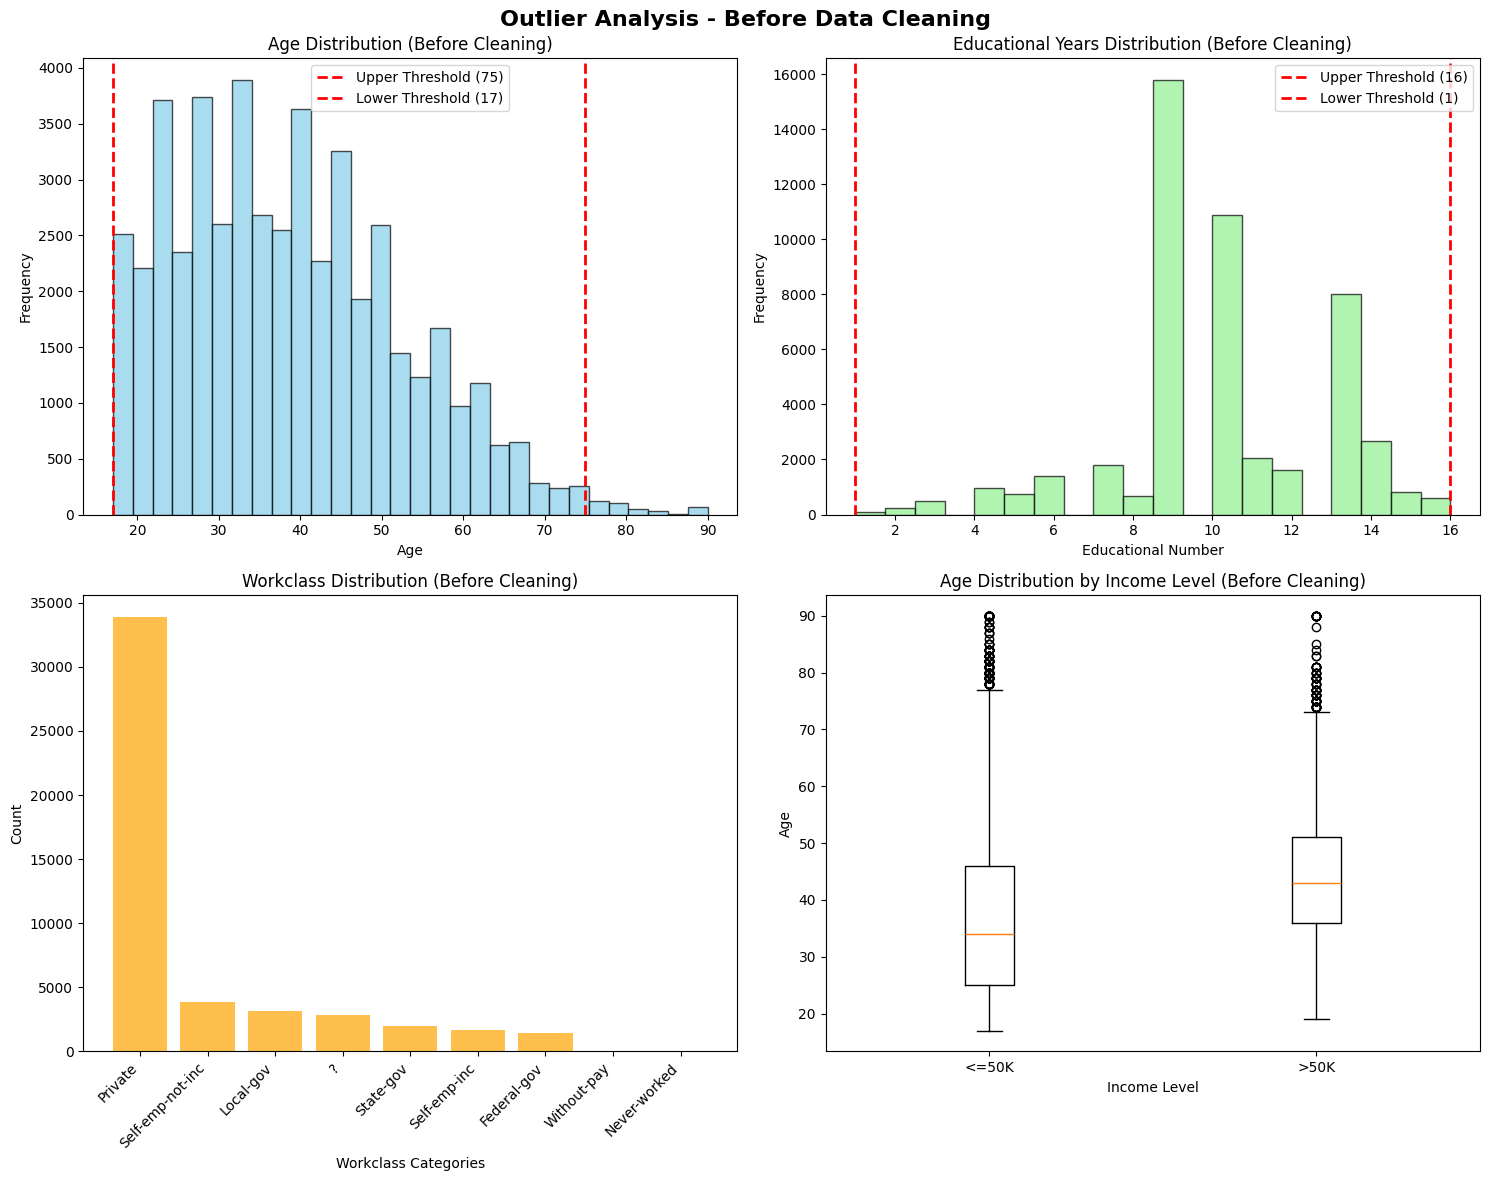


📋 OUTLIER REMOVAL SUMMARY:
  • Age outliers to remove: 373
  • Education outliers to remove: 0
  • Workclass outliers to remove: 31
  • Total outliers to remove: 404
  • Original dataset size: 48842
  • Expected clean dataset size: 48438


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

if data is None:
    print("Data not loaded. Please run the previous cell to load the dataset.")
else:
    print("=== OUTLIER ANALYSIS - BEFORE CLEANING ===\n")
    print("Dataset shape:", raw_data.shape)
    print("\nAge statistics:")
    print(raw_data['age'].describe())

    if 'educational-num' in raw_data.columns:
        print("\nEducational-num statistics:")
        print(raw_data['educational-num'].describe())
    print("\n📊 OUTLIER SAMPLES (Before Cleaning):")
    print("-" * 50)
    age_outliers = raw_data[(raw_data['age'] > 75) | (raw_data['age'] < 17)]

    if len(age_outliers) > 0:
        print(f"🔍 AGE OUTLIERS: {len(age_outliers)} records found")
        print("Sample extreme age records:")
        print(age_outliers[['age', 'workclass', 'occupation', 'income']].head(5))
    else:
        print("🔍 AGE OUTLIERS: None found")
    print()

    if 'educational-num' in raw_data.columns:
        edu_outliers = raw_data[(raw_data['educational-num'] > 16) | (raw_data['educational-num'] < 1)]
        if len(edu_outliers) > 0:
            print(f"🎓 EDUCATION OUTLIERS: {len(edu_outliers)} records found")
            print("Sample extreme education records:")
            print(edu_outliers[['age', 'educational-num', 'occupation', 'income']].head(5))
        else:
            print("🎓 EDUCATION OUTLIERS: None found")
    print()
    workclass_outliers = raw_data[raw_data['workclass'].isin(['Without-pay', 'Never-worked'])]

    if len(workclass_outliers) > 0:
        print(f"💼 WORKCLASS OUTLIERS: {len(workclass_outliers)} records found")
        print("Sample problematic workclass records:")
        print(workclass_outliers[['age', 'workclass', 'hours-per-week', 'income']].head(5))
    else:
        print("💼 WORKCLASS OUTLIERS: None found")
    print()
    print("🔍 MISSING VALUES ANALYSIS:")
    missing_data = raw_data.isnull().sum()
    missing_percentage = (missing_data / len(raw_data)) * 100

    for col in missing_data.index:
        if missing_data[col] > 0:
            print(f"  {col}: {missing_data[col]} missing ({missing_percentage[col]:.2f}%)")
    print("\n🔍 '?' VALUES ANALYSIS:")

    for col in raw_data.columns:
        if raw_data[col].dtype == 'object':
            question_marks = (raw_data[col] == '?').sum()
            if question_marks > 0:
                print(f"  {col}: {question_marks} '?' values ({(question_marks/len(raw_data)*100):.2f}%)")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Outlier Analysis - Before Data Cleaning', fontsize=16, fontweight='bold')

    axes[0, 0].hist(raw_data['age'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    axes[0, 0].axvline(75, color='red', linestyle='--', linewidth=2, label='Upper Threshold (75)')
    axes[0, 0].axvline(17, color='red', linestyle='--', linewidth=2, label='Lower Threshold (17)')
    axes[0, 0].set_title('Age Distribution (Before Cleaning)')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()

    if 'educational-num' in raw_data.columns:
        axes[0, 1].hist(raw_data['educational-num'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
        axes[0, 1].axvline(16, color='red', linestyle='--', linewidth=2, label='Upper Threshold (16)')
        axes[0, 1].axvline(1, color='red', linestyle='--', linewidth=2, label='Lower Threshold (1)')
        axes[0, 1].set_title('Educational Years Distribution (Before Cleaning)')
        axes[0, 1].set_xlabel('Educational Number')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].legend()
    else:
        fig.delaxes(axes[0,1])
    workclass_counts = raw_data['workclass'].value_counts()

    axes[1, 0].bar(range(len(workclass_counts)), workclass_counts.values, color='orange', alpha=0.7)
    axes[1, 0].set_title('Workclass Distribution (Before Cleaning)')
    axes[1, 0].set_xlabel('Workclass Categories')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_xticks(range(len(workclass_counts)))
    axes[1, 0].set_xticklabels(workclass_counts.index, rotation=45, ha='right')

    for i, category in enumerate(workclass_counts.index):
        if category in ['Without-pay', 'Never-worked']:
            axes[1, 0].bar(i, workclass_counts[category], color='red', alpha=0.8)

    if 'income' in raw_data.columns:
        income_data = raw_data[raw_data['income'] != '?']
        if not income_data.empty:
            unique_incomes = income_data['income'].unique()
            age_by_income = [income_data[income_data['income'] == income]['age'].values for income in unique_incomes]
            axes[1, 1].boxplot(age_by_income, labels=unique_incomes)
            axes[1, 1].set_title('Age Distribution by Income Level (Before Cleaning)')
            axes[1, 1].set_xlabel('Income Level')
            axes[1, 1].set_ylabel('Age')
        else:
            fig.delaxes(axes[1,1])
    else:
        fig.delaxes(axes[1,1])

    plt.tight_layout()
    plt.show()

    total_outliers = 0
    age_outliers_count = len(raw_data[(raw_data['age'] > 75) | (raw_data['age'] < 17)])
    workclass_outliers_count = len(raw_data[raw_data['workclass'].isin(['Without-pay', 'Never-worked'])])

    if 'educational-num' in raw_data.columns:
        edu_outliers_count = len(raw_data[(raw_data['educational-num'] > 16) | (raw_data['educational-num'] < 1)])
        total_outliers = age_outliers_count + edu_outliers_count + workclass_outliers_count
    else:
        edu_outliers_count = 0
        total_outliers = age_outliers_count + workclass_outliers_count

    print(f"\n📋 OUTLIER REMOVAL SUMMARY:")
    print(f"  • Age outliers to remove: {age_outliers_count}")
    print(f"  • Education outliers to remove: {edu_outliers_count}")
    print(f"  • Workclass outliers to remove: {workclass_outliers_count}")
    print(f"  • Total outliers to remove: {total_outliers}")
    print(f"  • Original dataset size: {len(raw_data)}")
    print(f"  • Expected clean dataset size: {len(raw_data) - total_outliers}")

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data.replace('?', np.nan, inplace=True)
    data['workclass'] = data['workclass'].fillna('Others')
    data['occupation'] = data['occupation'].fillna('Others')
    data['native-country'] = data['native-country'].fillna('United-States')
    data = data[data['workclass'] != 'Without-pay']
    data = data[data['workclass'] != 'Never-worked']
    data = data[(data['age'] >= 17) & (data['age'] <= 75)]
    if 'educational-num' in data.columns:
        data = data[(data['educational-num'] >= 1) & (data['educational-num'] <= 16)]
    if 'education' in data.columns:
        data.drop(columns=['education'], inplace=True)
    categorical_mappings = {}
    categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
    for column in categorical_cols:
        if column in data.columns:
            data[column] = data[column].astype(str)
            categorical_mappings[column] = sorted(data[column].unique().tolist())
    label_encoders = {}
    for column in categorical_cols:
        if column in data.columns:
            encoder = LabelEncoder()
            data[column] = encoder.fit_transform(data[column])
            label_encoders[column] = encoder
    X = data.drop(columns=['income'])
    y = data['income']
    income_encoder = LabelEncoder()
    y = income_encoder.fit_transform(y)
    label_encoders['income'] = income_encoder
    print("\nData types of features (X) after preprocessing:")
    print(X.dtypes)
    print("\nData type of target (y) after preprocessing:")
    print(y.dtype)
    return X, y, categorical_mappings, label_encoders

if 'file_name' in locals() and file_name:
    X, y, categorical_mappings, label_encoders = load_and_preprocess_data(file_name)
    print(f"\nProcessed Features Shape: {X.shape}")
    print(f"Target Shape: {y.shape}")
    print(f"Feature columns: {X.columns.tolist()}")
else:
    print("File name not set. Please ensure the data loading cell ran successfully.")


Data types of features (X) after preprocessing:
age                int64
workclass          int64
fnlwgt             int64
educational-num    int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
gender             int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
dtype: object

Data type of target (y) after preprocessing:
int64

Processed Features Shape: (48438, 13)
Target Shape: (48438,)
Feature columns: ['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


=== OUTLIER ANALYSIS - AFTER CLEANING ===

Cleaned dataset shape: (48438, 13)
Data reduction: 404 records removed
Percentage retained: 99.17%

📊 CLEANED DATA STATISTICS:
----------------------------------------
Cleaned dataset shape: (48438, 13)
Percentage retained: 99.17%

Target distribution after cleaning:
<=50K    36812
>50K     11626
Name: count, dtype: int64
Class balance: {'<=50K': 76.0, '>50K': 24.0}
Age range: 17 to 75
Age mean: 38.32
Education range: 1 to 16
Education mean: 10.09

Target distribution after cleaning:
<=50K    36812
>50K     11626
Name: count, dtype: int64
Class balance: {'<=50K': 76.0, '>50K': 24.0}


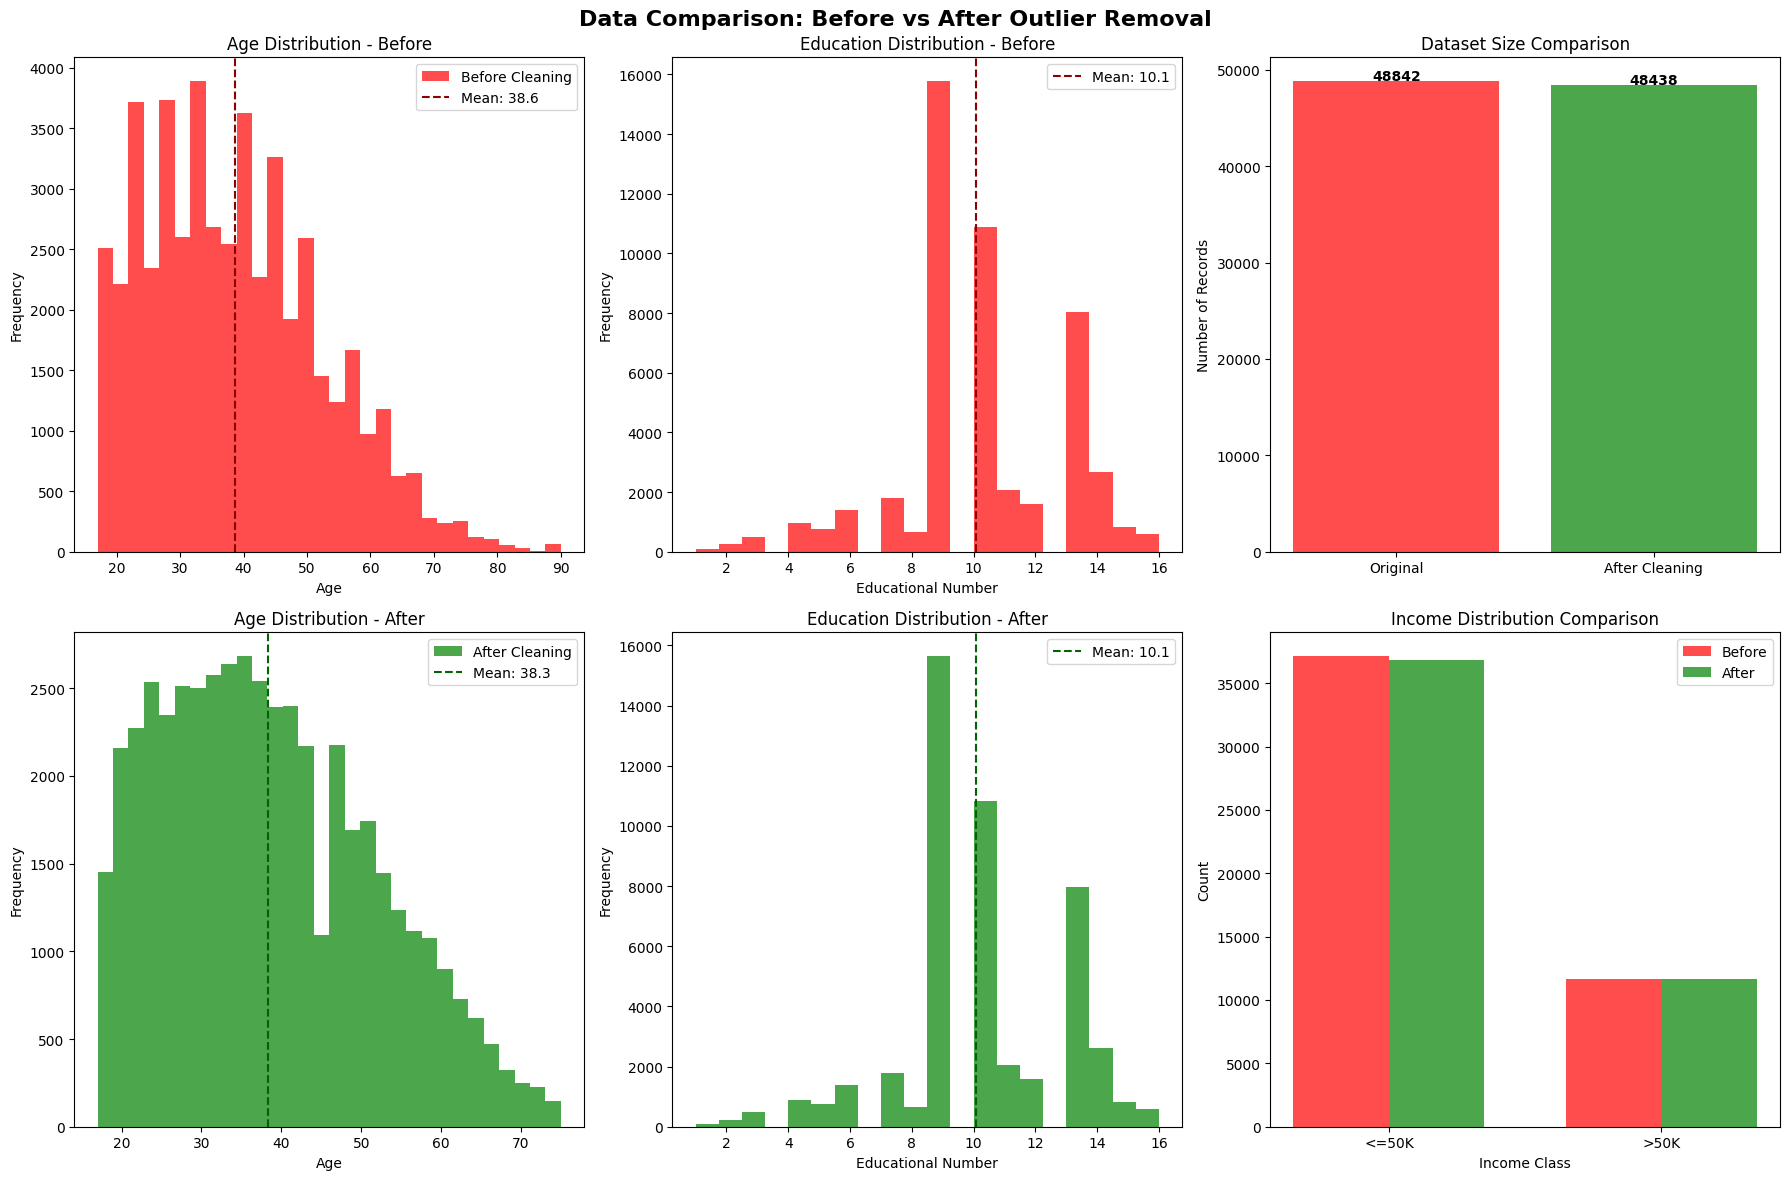


🗑️ SAMPLE RECORDS THAT WERE REMOVED:
Age Outliers Removed (Sample):
     age         workclass     occupation  hours-per-week income
193   79                 ?              ?              40  <=50K
229   77                 ?              ?              35  <=50K
234   80  Self-emp-not-inc  Other-service              30  <=50K

Problematic Workclass Records Removed (Sample):
      age    workclass  hours-per-week income
2957   19  Without-pay              10  <=50K
3177   74  Without-pay              20  <=50K
6466   51  Without-pay              45  <=50K

No educational outliers were removed based on the defined thresholds.


✅ Data cleaning completed successfully!
📊 Quality improvement: Removed 404 problematic records


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if 'raw_data' not in locals() or raw_data is None:
    print("Raw data not available. Please run previous cells.")
elif 'X' not in locals() or X is None or 'y' not in locals() or y is None:
    print("Processed data (X, y) not available. Please run previous cells.")
else:
    print("=== OUTLIER ANALYSIS - AFTER CLEANING ===\n")
    print("Cleaned dataset shape:", X.shape)
    print("Data reduction:", len(raw_data) - len(X), "records removed")
    print(f"Percentage retained: {(len(X)/len(raw_data)*100):.2f}%")
    print("\n📊 CLEANED DATA STATISTICS:")
    print("-" * 40)
    print(f"Cleaned dataset shape: {X.shape}")
    print(f"Percentage retained: {(len(X)/len(raw_data)*100):.2f}%")
    print("\nTarget distribution after cleaning:")

    if 'income' in label_encoders:
        decoded_y = label_encoders['income'].inverse_transform(y)
        print(pd.Series(decoded_y).value_counts())
        print(f"Class balance: {(pd.Series(decoded_y).value_counts(normalize=True)*100).round(2).to_dict()}")
    else:
        print(y.value_counts())

    if 'age' in X.columns:
        print("Age range:", X['age'].min(), "to", X['age'].max())
        print("Age mean:", round(X['age'].mean(), 2))

    if 'educational-num' in X.columns:
        print("Education range:", X['educational-num'].min(), "to", X['educational-num'].max())
        print("Education mean:", round(X['educational-num'].mean(), 2))
    print(f"\nTarget distribution after cleaning:")

    if 'income' in label_encoders:
        decoded_y = label_encoders['income'].inverse_transform(y)
        print(pd.Series(decoded_y).value_counts())
        print(f"Class balance: {(pd.Series(decoded_y).value_counts(normalize=True)*100).round(2).to_dict()}")
    else:
        print(y.value_counts())
        print(f"Class balance: {(y.value_counts(normalize=True)*100).round(2).to_dict()}")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Data Comparison: Before vs After Outlier Removal', fontsize=16, fontweight='bold')

    axes[0, 0].hist(raw_data['age'], bins=30, alpha=0.7, color='red', label='Before Cleaning')
    axes[0, 0].set_title('Age Distribution - Before')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(raw_data['age'].mean(), color='darkred', linestyle='--', label=f'Mean: {raw_data["age"].mean():.1f}')
    axes[0, 0].legend()
    axes[1, 0].hist(X['age'], bins=30, alpha=0.7, color='green', label='After Cleaning')
    axes[1, 0].set_title('Age Distribution - After')
    axes[1, 0].set_xlabel('Age')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].axvline(X['age'].mean(), color='darkgreen', linestyle='--', label=f'Mean: {X["age"].mean():.1f}')
    axes[1, 0].legend()

    if 'educational-num' in raw_data.columns and 'educational-num' in X.columns:
        axes[0, 1].hist(raw_data['educational-num'], bins=20, alpha=0.7, color='red')
        axes[0, 1].set_title('Education Distribution - Before')
        axes[0, 1].set_xlabel('Educational Number')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(raw_data['educational-num'].mean(), color='darkred', linestyle='--', label=f'Mean: {raw_data["educational-num"].mean():.1f}')
        axes[0, 1].legend()
        axes[1, 1].hist(X['educational-num'], bins=20, alpha=0.7, color='green')
        axes[1, 1].set_title('Education Distribution - After')
        axes[1, 1].set_xlabel('Educational Number')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].axvline(X['educational-num'].mean(), color='darkgreen', linestyle='--', label=f'Mean: {X["educational-num"].mean():.1f}')
        axes[1, 1].legend()

    else:
        fig.delaxes(axes[0,1])
        fig.delaxes(axes[1,1])

    categories = ['Original', 'After Cleaning']
    sizes = [len(raw_data), len(X)]
    colors = ['red', 'green']

    axes[0, 2].bar(categories, sizes, color=colors, alpha=0.7)
    axes[0, 2].set_title('Dataset Size Comparison')
    axes[0, 2].set_ylabel('Number of Records')

    for i, v in enumerate(sizes):
        axes[0, 2].text(i, v + 100, str(v), ha='center', fontweight='bold')

    if 'income' in raw_data.columns:
        raw_income_dist = raw_data[raw_data['income'] != '?']['income'].value_counts()
    else:
        raw_income_dist = pd.Series()

    if 'income' in label_encoders:
        clean_income_dist = pd.Series(label_encoders['income'].inverse_transform(y)).value_counts()
    else:
        clean_income_dist = y.value_counts()

    all_income_labels = sorted(list(set(raw_income_dist.index.tolist() + clean_income_dist.index.tolist())))
    raw_income_plot = raw_income_dist.reindex(all_income_labels, fill_value=0)
    clean_income_plot = clean_income_dist.reindex(all_income_labels, fill_value=0)

    x_pos = np.arange(len(all_income_labels))

    width = 0.35

    axes[1, 2].bar(x_pos - width/2, raw_income_plot.values, width, label='Before', color='red', alpha=0.7)
    axes[1, 2].bar(x_pos + width/2, clean_income_plot.values, width, label='After', color='green', alpha=0.7)
    axes[1, 2].set_title('Income Distribution Comparison')
    axes[1, 2].set_xlabel('Income Class')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].set_xticks(x_pos)
    axes[1, 2].set_xticklabels(all_income_labels)
    axes[1, 2].legend()

    plt.tight_layout()
    plt.show()

    print("\n🗑️ SAMPLE RECORDS THAT WERE REMOVED:")
    print("=" * 60)
    removed_age = raw_data[(raw_data['age'] > 75) | (raw_data['age'] < 17)]

    if not removed_age.empty:
        print("Age Outliers Removed (Sample):")
        print(removed_age[['age', 'workclass', 'occupation', 'hours-per-week', 'income']].head(3))
        print()
    else:
        print("No age outliers were removed based on the defined thresholds.")
        print()
    removed_workclass = raw_data[raw_data['workclass'].isin(['Without-pay', 'Never-worked'])]

    if not removed_workclass.empty:
        print("Problematic Workclass Records Removed (Sample):")
        print(removed_workclass[['age', 'workclass', 'hours-per-week', 'income']].head(3))
        print()
    else:
        print("No problematic workclass records were removed.")
        print()

    if 'educational-num' in raw_data.columns:
        removed_edu = raw_data[(raw_data['educational-num'] > 16) | (raw_data['educational-num'] < 1)]
        if not removed_edu.empty:
            print("Education Outliers Removed (Sample):")
            print(removed_edu[['age', 'educational-num', 'occupation', 'income']].head(3))
            print()
        else:
            print("No educational outliers were removed based on the defined thresholds.")
            print()
    else:
        print("Educational-num column not found in raw data for outlier analysis.")
        print()

    print(f"\n✅ Data cleaning completed successfully!")
    print(f"📊 Quality improvement: Removed {len(raw_data) - len(X)} problematic records")

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd

if 'X' not in locals() or X is None or 'y' not in locals() or y is None:
    print("Processed data (X, y) not available. Please run previous cells.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")
    print(f"Training target shape: {y_train.shape}")
    print(f"Testing target shape: {y_test.shape}")
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
    }
    trained_models = {}
    model_performance = {}
    print("\n=== MODEL TRAINING AND EVALUATION ===")

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} - Mean Squared Error (MSE): {mse:.4f}")
        print(f"{name} - R-squared (R2): {r2:.4f}")
        trained_models[name] = model
        model_performance[name] = {'MSE': mse, 'R2': r2}
    print("\n=== MODEL COMPARISON ===")

    performance_df = pd.DataFrame(model_performance).T

    print(performance_df)

    best_model_name = performance_df['R2'].idxmax()

    best_model = trained_models[best_model_name]

    print(f"\n🏆 Best performing model (based on R2): {best_model_name}")

Training features shape: (38750, 13)
Testing features shape: (9688, 13)
Training target shape: (38750,)
Testing target shape: (9688,)

=== MODEL TRAINING AND EVALUATION ===

Training Linear Regression...
Linear Regression - Mean Squared Error (MSE): 0.1356
Linear Regression - R-squared (R2): 0.2650

Training Decision Tree Regressor...
Decision Tree Regressor - Mean Squared Error (MSE): 0.1860
Decision Tree Regressor - R-squared (R2): -0.0077

Training Random Forest Regressor...
Random Forest Regressor - Mean Squared Error (MSE): 0.1027
Random Forest Regressor - R-squared (R2): 0.4432

Training Gradient Boosting Regressor...
Gradient Boosting Regressor - Mean Squared Error (MSE): 0.0971
Gradient Boosting Regressor - R-squared (R2): 0.4740

=== MODEL COMPARISON ===
                                  MSE        R2
Linear Regression            0.135633  0.264954
Decision Tree Regressor      0.185952 -0.007739
Random Forest Regressor      0.102748  0.443170
Gradient Boosting Regressor  0.097

In [27]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

import os

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

def load_and_preprocess_data_for_app(file_path):
    data = pd.read_csv(file_path)
    data.replace('?', np.nan, inplace=True)
    data['workclass'] = data['workclass'].fillna('Others')
    data['occupation'] = data['occupation'].fillna('Others')
    data['native-country'] = data['native-country'].fillna('United-States')
    data = data[data['workclass'] != 'Without-pay']
    data = data[data['workclass'] != 'Never-worked']
    data = data[(data['age'] >= 17) & (data['age'] <= 75)]

    if 'educational-num' in data.columns:
        data = data[(data['educational-num'] >= 1) & (data['educational-num'] <= 16)]

    if 'education' in data.columns:
        data.drop(columns=['education'], inplace=True)
    categorical_mappings = {}
    categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

    for column in categorical_cols:
        if column in data.columns:
            data[column] = data[column].astype(str)
            categorical_mappings[column] = sorted(data[column].unique().tolist())
    label_encoders = {}

    for column in categorical_cols:
        if column in data.columns:
            encoder = LabelEncoder()
            data[column] = encoder.fit_transform(data[column])
            label_encoders[column] = encoder

    X = data.drop(columns=['income'])
    y = data['income']

    income_encoder = LabelEncoder()
    y = income_encoder.fit_transform(y)
    label_encoders['income'] = income_encoder

    return X, y, categorical_mappings, label_encoders

@st.cache_resource
def load_data_and_train_models():
    if os.path.exists('adult.csv'):
        data_file_path = 'adult.csv'
    elif os.path.exists('data/adult.csv'):
        data_file_path = 'data/adult.csv'
    elif os.path.exists('dataset/adult.csv'):
        data_file_path = 'dataset/adult.csv'
    else:
        st.error("Dataset 'adult.csv' not found. Please ensure it's uploaded or in a 'data/' folder.")
        st.stop()
    X, y, categorical_mappings, label_encoders = load_and_preprocess_data_for_app(data_file_path)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
        'Random Forest Regressor': RandomForestRegressor(random_state=42),
        'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
    }
    trained_models = {}
    model_performance = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        trained_models[name] = model
        model_performance[name] = {'MSE': mse, 'R2': r2}
    best_model = trained_models['Gradient Boosting Regressor']
    performance_df = pd.DataFrame(model_performance).T
    return data_file_path, X.columns, categorical_mappings, label_encoders, trained_models, best_model, performance_df

data_file_path, feature_columns, categorical_mappings, label_encoders, trained_models, best_model, performance_df = load_data_and_train_models()

st.set_page_config(page_title="Employee Salary Predictor", layout="wide")

st.title("💰 Employee Salary Predictor")
st.markdown("Predict the income bracket (<=50K or >50K) of an employee based on their attributes.")

st.header("Employee Attributes")

col1, col2, col3 = st.columns(3)

with col1:
    age = st.slider("Age", 17, 75, 30)
    workclass = st.selectbox("Workclass", categorical_mappings['workclass'])
    fnlwgt = st.number_input("Fnlwgt (Final Weight)", 10000, 1000000, 200000)
    educational_num = st.slider("Educational Years (1-16)", 1, 16, 10)

with col2:
    marital_status = st.selectbox("Marital Status", categorical_mappings['marital-status'])
    occupation = st.selectbox("Occupation", categorical_mappings['occupation'])
    relationship = st.selectbox("Relationship", categorical_mappings['relationship'])
    race = st.selectbox("Race", categorical_mappings['race'])

with col3:
    gender = st.selectbox("Gender", categorical_mappings['gender'])
    capital_gain = st.number_input("Capital Gain", 0, 100000, 0)
    capital_loss = st.number_input("Capital Loss", 0, 5000, 0)
    hours_per_week = st.slider("Hours per Week", 1, 99, 40)
    native_country = st.selectbox("Native Country", categorical_mappings['native-country'])

if st.button("Predict Income"):
    input_data = pd.DataFrame([{
        'age': age,
        'workclass': workclass,
        'fnlwgt': fnlwgt,
        'educational-num': educational_num,
        'marital-status': marital_status,
        'occupation': occupation,
        'relationship': relationship,
        'race': race,
        'gender': gender,
        'capital-gain': capital_gain,
        'capital-loss': capital_loss,
        'hours-per-week': hours_per_week,
        'native-country': native_country
    }])
    if 'hours-per-week' in feature_columns and 'hours-per-week' in input_data.columns:
        input_data.rename(columns={'hours-per-week': 'hours-per-week'}, inplace=True)
    elif 'hours-per-week' not in input_data.columns and 'hours-per-week' in feature_columns:
        pass
    for col, encoder in label_encoders.items():
        if col in input_data.columns and col != 'income':
            try:
                input_data[col] = encoder.transform(input_data[col])
            except ValueError:
                st.warning(f"Unseen category in column: {col}. Using a default value.")
                input_data[col] = -1
    input_data = input_data[feature_columns]
    prediction_encoded = best_model.predict(input_data)[0]
    prediction_label = label_encoders['income'].inverse_transform([int(round(prediction_encoded))])[0]
    st.subheader("Prediction Result:")
    if prediction_label == ">50K":
        st.success(f"The predicted income is: **{prediction_label}** (High Income)")
    else:
        st.info(f"The predicted income is: **{prediction_label}** (Low Income)")

st.markdown("---")
st.markdown("### About the Data and Model")
st.markdown("""
This application uses the Adult Income dataset to predict whether an individual's income is above or below $50,000.
The model used for prediction is a **Gradient Boosting Regressor**, which was found to be the best performing among several tested models.
""")

st.header("Model Performance Comparison")
st.markdown("Here's how the trained models performed on the test data:")

st.dataframe(performance_df)

st.markdown("---")
st.markdown("### Sample Outlier Records (Before Cleaning)")
st.markdown("Below are examples of records that were identified and removed during the data preprocessing phase due to being outliers or having problematic values.")

@st.cache_data
def get_sample_outliers(file_path):
    raw_data = pd.read_csv(file_path)
    raw_data.replace('?', np.nan, inplace=True)
    age_outliers = raw_data[(raw_data['age'] > 75) | (raw_data['age'] < 17)]
    workclass_outliers = raw_data[raw_data['workclass'].isin(['Without-pay', 'Never-worked'])]
    sample_outliers = pd.DataFrame()

    if not age_outliers.empty:
        sample_outliers = pd.concat([sample_outliers, age_outliers[['age', 'workclass', 'occupation', 'income']].head(2)])
    if not workclass_outliers.empty:
        sample_outliers = pd.concat([sample_outliers, workclass_outliers[['age', 'workclass', 'hours-per-week', 'income']].head(2)])
    return sample_outliers.drop_duplicates()

sample_outliers_df = get_sample_outliers(data_file_path)
if not sample_outliers_df.empty:
    st.write("Example records removed due to age or workclass outliers:")
    st.dataframe(sample_outliers_df)
else:
    st.write("No specific outlier samples to display based on the defined criteria.")

Overwriting app.py


In [28]:
from pyngrok import ngrok
import subprocess
import time

from pyngrok import ngrok
from google.colab import userdata

NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
!killall -9 ngrok

subprocess.Popen(["nohup", "streamlit", "run", "app.py", "--server.port", "8501", "--server.enableCORS", "false", "--server.enableXsrfProtection", "false", "&"])

time.sleep(5)

try:
    public_url = ngrok.connect(addr="8501", proto="http")
    print(f"🚀Streamlit App is Live! Access it at: {public_url}")
except Exception as e:
    print(f"Error starting Ngrok tunnel: {e}")
    print("Please ensure you have an ngrok auth token configured if you encounter issues.")
    print("You can get one from https://ngrok.com/ and set it using `!ngrok authtoken YOUR_AUTH_TOKEN`")

ERROR:pyngrok.process.ngrok:t=2025-07-22T11:48:50+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2025-07-22T11:48:50+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok st

Error starting Ngrok tunnel: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.
Please ensure you have an ngrok auth token configured if you encounter issues.
You can get one from https://ngrok.com/ and set it using `!ngrok authtoken YOUR_AUTH_TOKEN`
